In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models,Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [53]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [54]:
print('train_images shape:', train_images.shape)
print('test_images shape:', train_labels.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (50000, 32, 32, 3)
test_images shape: (50000, 1)
50000 train samples
10000 test samples


In [55]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

C:\Users\ufukk\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

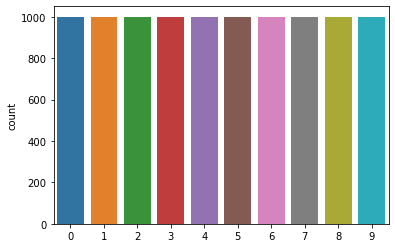

In [56]:
sns.countplot(test_labels.ravel())

In [57]:
#There 10 classes
n_classes=10
train_labels=keras.utils.to_categorical(train_labels,n_classes)
test_labels=keras.utils.to_categorical(test_labels,n_classes)

In [58]:
#define the convnet
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [62]:
history=model.fit(train_images,train_labels,batch_size=32,epochs=20,validation_data=(test_images,test_labels),shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 279s 169ms/step - loss: 1.4186 - accuracy: 0.5098 - val_loss: 1.1490 - val_accuracy: 0.5907
Epoch 2/20
1563/1563 [==============================] - 248s 159ms/step - loss: 0.9634 - accuracy: 0.6664 - val_loss: 0.8968 - val_accuracy: 0.6817
Epoch 3/20
1563/1563 [==============================] - 259s 166ms/step - loss: 0.7868 - accuracy: 0.7256 - val_loss: 0.8094 - val_accuracy: 0.7211
Epoch 4/20
1563/1563 [==============================] - 284s 182ms/step - loss: 0.6752 - accuracy: 0.7661 - val_loss: 0.7304 - val_accuracy: 0.7542
Epoch 5/20
1563/1563 [==============================] - 289s 185ms/step - loss: 0.5846 - accuracy: 0.7976 - val_loss: 0.7409 - val_accuracy: 0.7548
Epoch 6/20
1563/1563 [==============================] - 273s 175ms/step - loss: 0.5046 - accuracy: 0.8263 - val_loss: 0.7690 - val_accuracy: 0.7685
Epoch 7/20
1563/1563 [==============================] - 268s 171ms/step - loss: 0.4444 - accuracy: 0.8443 - val_

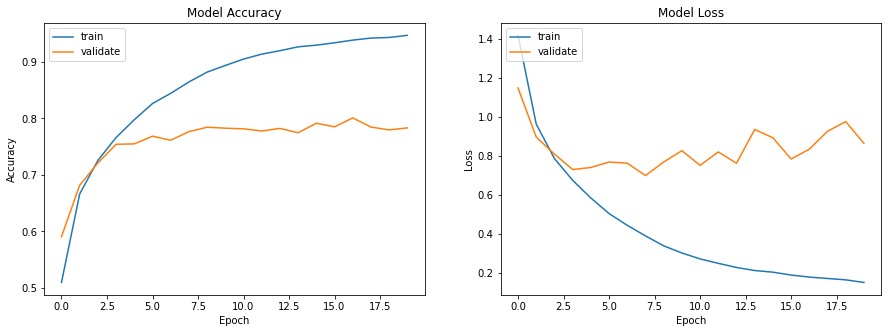

In [63]:
def modelhistory(history):
    fig,axs=plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

    
modelhistory(history)

In [64]:
#Score trained model
scores=model.evaluate(test_images,test_labels,verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 13s 41ms/step - loss: 0.8650 - accuracy: 0.7831
Test loss: 0.8650175929069519
Test accuracy: 0.7831000089645386


In [66]:
pred = model.predict(test_images)

In [80]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
 
    """
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

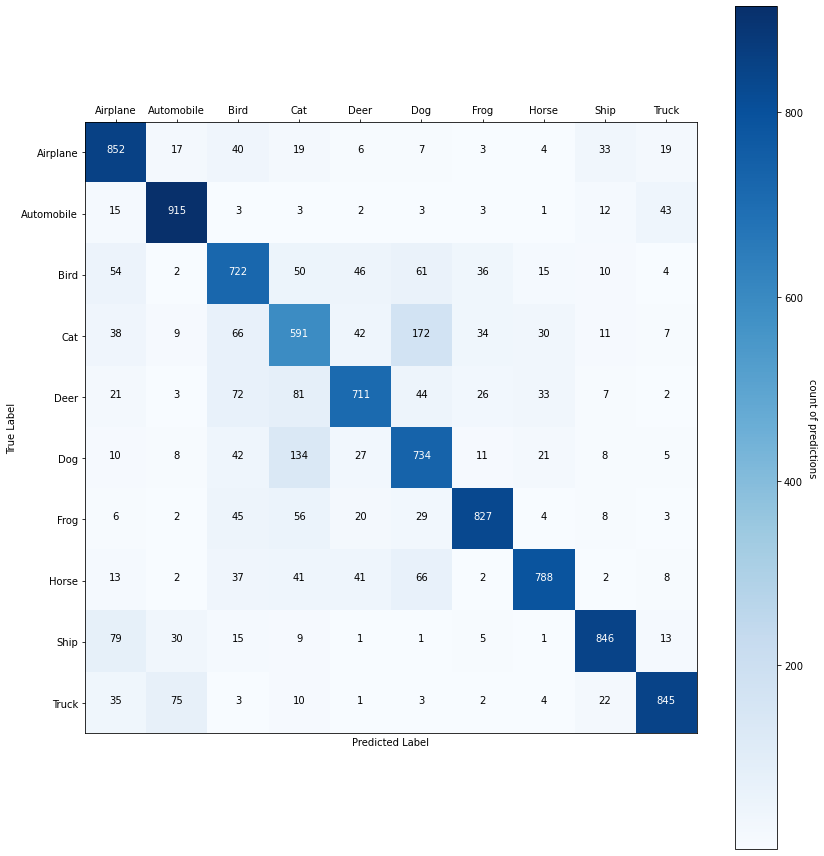

In [81]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Y_pred_classes = np.argmax(pred, axis=1) 
Y_true = np.argmax(test_labels, axis=1)
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = test_images[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

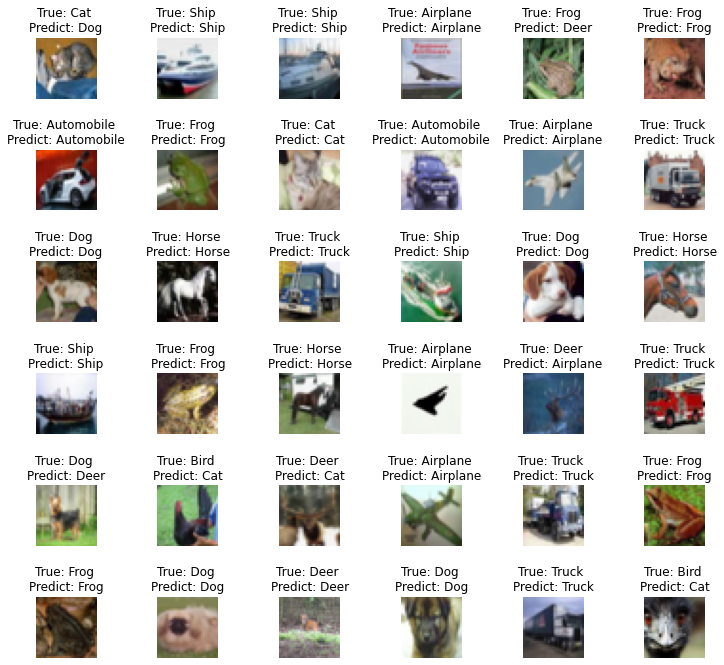

In [90]:

fig, axes = plt.subplots(6, 6, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, 36):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

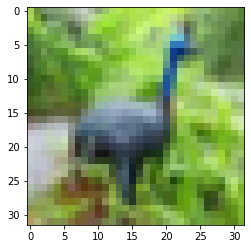